In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', None)
import numpy as np
import seaborn as sns
import gc

In [2]:
labevents_selectlabel_list_mean_expiry_age_df=pd.read_csv("../CDS_Lab_Analysis/labevents_selectlabel_list_mean_expiry_age_df.csv")
labevents_selectlabel_list_mean_expiry_age_df.shape

(17931, 35)

In [3]:
labevents_chartevents_selectlist_mean_expiry_age_diagnosis_df=pd.read_csv('labevents_chartevents_selectlist_mean_expiry_age_diagnosis_df.csv')
labevents_chartevents_selectlist_mean_expiry_age_diagnosis_df.shape

(8042, 50)

In [4]:
patient_expired_age_diagnosis_full=pd.read_excel("../CDS_Data/patient_expired_age_diagnosis_full.xlsx")
patient_expired_age_diagnosis_full.shape

(22569, 8)

In [5]:
patient_expired_age_diagnosis_full.head(2)

,Unnamed: 0,HADM_ID,SUBJECT_ID,DIAGNOSIS,DOB,DOD,age,age in years
0,0,124271,250,PNEUMONIA;R/O TB,2164-12-27 00:00:00,2188-11-22 00:00:00,"relativedelta(years=+23, months=+10, days=+26)",23
1,1,179006,257,SUBARACHNOID HEMORRHAGE;TELEMETRY,2031-04-03 00:00:00,2121-07-08 00:00:00,"relativedelta(years=+90, months=+3, days=+5)",90


In [6]:
patient_all_age_diagnosis_full_df=pd.read_csv('../CDS_Data/patient_all_age_diagnosis_full.csv')
patient_all_age_diagnosis_full_df.shape

(58976, 14)

In [7]:
patient_all_age_diagnosis_full_df.head(2)

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,HADM_ID,ADMITTIME,DIAGNOSIS,age,age in years,HOSPITAL_EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,116935,2149-12-17 20:41:00,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,"relativedelta(years=+74, months=+9, days=+4, hours=+20, minutes=+41)",74,0
1,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,149546,2155-02-03 20:16:00,GI BLEED/ CHEST PAIN,"relativedelta(years=+79, months=+10, days=+21, hours=+20, minutes=+16)",79,0


In [8]:
ht_wt_df=pd.read_csv("../CDS_Data/height_weight.csv")
ht_wt_df.shape

(61532, 7)

In [9]:
ht_wt_df.head()

,icustay_id,weight_first,weight_min,weight_max,height_first,height_min,height_max
0,200017,1.31,1.09,2.78,39.00,39.00,47.00
1,200025,140.40,140.40,145.60,193.04,193.04,193.04
2,200037,1.99,1.80,2.14,45.00,44.50,45.00
3,200046,0.83,0.69,2.83,34.00,33.00,48.00
4,200058,2.29,2.16,2.29,46.50,46.50,46.50


In [10]:
ht_wt_notna_df=ht_wt_df[(ht_wt_df['weight_first'].notna())&(ht_wt_df['height_first'].notna())]
ht_wt_notna_df.shape

(28892, 7)

In [11]:
icustays_df=pd.read_csv("../CDS_Data/ICUSTAYS.csv")
icustays_df.head(2)

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788


In [12]:
ht_wt_notna_df.rename(columns={'icustay_id':'ICUSTAY_ID'},inplace=True)
ht_wt_notna_df.head(2)

E:\anaconda3\envs\tf\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ICUSTAY_ID,weight_first,weight_min,weight_max,height_first,height_min,height_max
0,200017,1.31,1.09,2.78,39.00,39.00,47.00
1,200025,140.40,140.40,145.60,193.04,193.04,193.04


In [13]:
ht_wt_notna_hadmid_df=icustays_df[['HADM_ID','ICUSTAY_ID']].merge(ht_wt_notna_df)
ht_wt_notna_hadmid_df.shape

(28892, 8)

In [14]:
ht_wt_notna_hadmid_df['BMI']=10000*ht_wt_notna_hadmid_df['weight_first']/np.power(ht_wt_notna_hadmid_df['height_first'],2)
ht_wt_notna_hadmid_df.head(2)

,HADM_ID,ICUSTAY_ID,weight_first,weight_min,weight_max,height_first,height_min,height_max,BMI
0,173727,249196,93.0,93.0,107.9,172.72,172.72,172.72,31.174370
1,135156,206327,83.0,83.0,83.0,172.72,172.72,172.72,27.822287


In [38]:
ht_wt_notna_hadmid_age_df=ht_wt_notna_hadmid_df.merge(patient_all_age_diagnosis_full_df[['HADM_ID','EXPIRE_FLAG','age in years','DIAGNOSIS']])
ht_wt_notna_hadmid_age_df.shape

(28892, 12)

In [39]:
ht_wt_notna_hadmid_age_expired_df=ht_wt_notna_hadmid_age_df[ht_wt_notna_hadmid_age_df['EXPIRE_FLAG']==1].copy()
ht_wt_notna_hadmid_age_expired_df.shape

(10287, 12)

In [40]:
ht_wt_notna_hadmid_age_50_df=ht_wt_notna_hadmid_age_df[(ht_wt_notna_hadmid_age_df['age in years']>=50) &(ht_wt_notna_hadmid_age_df['age in years']<300)].copy()
ht_wt_notna_hadmid_age_50_df.shape

(19463, 12)

In [41]:
ht_wt_notna_hadmid_age_50_expired_df=ht_wt_notna_hadmid_age_50_df[ht_wt_notna_hadmid_age_50_df['EXPIRE_FLAG']==1].copy()
ht_wt_notna_hadmid_age_50_expired_df.shape

(8520, 12)

In [42]:
ht_wt_notna_hadmid_age_expired_df[['BMI','age in years']].corr()

,BMI,age in years
BMI,1.000000,-0.104945
age in years,-0.104945,1.000000


In [43]:
ht_wt_notna_hadmid_age_50_expired_df[['BMI','age in years']].corr()

,BMI,age in years
BMI,1.000000,-0.186274
age in years,-0.186274,1.000000


In [44]:
ht_wt_notna_hadmid_age_50_expired_df.columns[2:]

Index(['weight_first', 'weight_min', 'weight_max', 'height_first',
       'height_min', 'height_max', 'BMI', 'EXPIRE_FLAG', 'age in years',
       'DIAGNOSIS'],
      dtype='object')

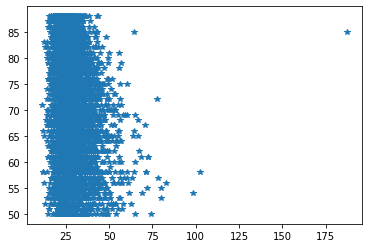

In [22]:
plt.plot(ht_wt_notna_hadmid_age_50_expired_df['BMI'],ht_wt_notna_hadmid_age_50_expired_df['age in years'],'*')

<AxesSubplot:xlabel='BMI'>

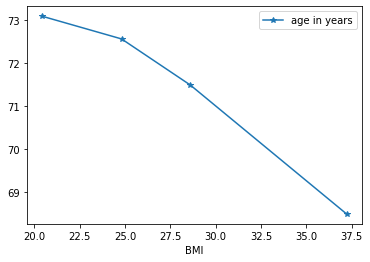

In [45]:
ht_wt_notna_hadmid_age_50_expired_df[['BMI','age in years']].groupby(pd.cut(ht_wt_notna_hadmid_age_50_expired_df['BMI'], [ht_wt_notna_hadmid_age_50_expired_df['BMI'].min(),ht_wt_notna_hadmid_age_50_expired_df['BMI'].describe()['25%'], ht_wt_notna_hadmid_age_50_expired_df['BMI'].describe()['50%'],ht_wt_notna_hadmid_age_50_expired_df['BMI'].describe()['75%'],ht_wt_notna_hadmid_age_50_expired_df['BMI'].max()])).mean().plot(marker='*',x='BMI',y='age in years')

In [46]:
ht_wt_notna_hadmid_age_50_df[ht_wt_notna_hadmid_age_50_df.columns[2:]].describe()

,weight_first,weight_min,weight_max,height_first,height_min,height_max,BMI,EXPIRE_FLAG,age in years
count,19463.000000,19463.000000,1.946300e+04,19463.000000,19463.000000,19463.000000,19463.000000,19463.000000,19463.000000
mean,81.904061,80.706378,5.325405e+02,169.376079,169.370141,169.400092,28.500222,0.437754,68.686893
std,21.811206,21.434335,6.203637e+04,10.637964,10.638982,10.629590,7.101665,0.496123,10.346762
min,26.400000,0.620000,2.640000e+01,121.920000,121.920000,121.920000,9.538981,0.000000,50.000000
25%,67.300000,66.300000,7.130000e+01,162.560000,162.560000,162.560000,23.978380,0.000000,60.000000
50%,79.600000,78.500000,8.440000e+01,170.180000,170.180000,170.180000,27.428278,0.000000,69.000000
75%,93.100000,92.000000,9.900000e+01,177.800000,177.800000,177.800000,31.595961,1.000000,77.000000
max,510.000000,510.000000,8.654765e+06,210.820000,210.820000,210.820000,187.100966,1.000000,89.000000


In [25]:
labevents_selectlabel_list_mean_expiry_age_df.head(2)

,HADM_ID,Hematocrit,White Blood Cells,Platelet Count,Hemoglobin,MCHC,MCV,MCH,Red Blood Cells,RDW,...,"Bilirubin, Total",Lactate,Alanine Aminotransferase (ALT),Asparate Aminotransferase (AST),Alkaline Phosphatase,Albumin,NLR,HOSPITAL_EXPIRE_FLAG,EXPIRE_FLAG,age in years
0,100003.0,27.781818,13.328571,145.285714,9.037500,33.900000,92.428571,31.342857,2.940000,20.457143,...,3.8,1.10,115.6,235.6,122.8,2.40,2.083904,0,1,59
1,100011.0,27.562963,11.829412,518.058824,10.327778,34.358824,91.294118,31.347059,3.244706,14.635294,...,1.2,3.05,80.0,70.0,154.0,2.45,7.684211,0,0,21


In [26]:
labevents_selectlabel_list_mean_expiry_age_df.shape

(17931, 35)

In [27]:
labevents_selectlabel_list_mean_expiry_age_df.columns

Index(['HADM_ID', 'Hematocrit', 'White Blood Cells', 'Platelet Count',
       'Hemoglobin', 'MCHC', 'MCV', 'MCH', 'Red Blood Cells', 'RDW',
       'Anion Gap', 'Urea Nitrogen', 'Creatinine', 'Glucose', 'Magnesium',
       'Calcium, Total', 'Phosphate', 'INR(PT)', 'PT', 'PTT', 'Lymphocytes',
       'Monocytes', 'Neutrophils', 'Eosinophils', 'Basophils',
       'Bilirubin, Total', 'Lactate', 'Alanine Aminotransferase (ALT)',
       'Asparate Aminotransferase (AST)', 'Alkaline Phosphatase', 'Albumin',
       'NLR', 'HOSPITAL_EXPIRE_FLAG', 'EXPIRE_FLAG', 'age in years'],
      dtype='object')

In [28]:
labevents_chartevents_selectlist_mean_expiry_age_diagnosis_df.head(2)

,HADM_ID,Potassium,Hematocrit,White Blood Cells,Platelet Count,Hemoglobin,MCHC,MCV,MCH,Red Blood Cells,...,mean_spo2,HOSPITAL_EXPIRE_FLAG,EXPIRE_FLAG,age in years,DOB,DOD,ADMITTIME,DIAGNOSIS,survival_time,100d_expiry
0,100003.0,4.783333,27.781818,13.328571,145.285714,9.037500,33.900000,92.428571,31.342857,2.940000,...,98.229167,0,1,59,5/19/2090 0:00,12/28/2150 0:00,4/17/2150 15:34,UPPER GI BLEED,254 days 08:26:00,0
1,100011.0,4.084615,27.562963,11.829412,518.058824,10.327778,34.358824,91.294118,31.347059,3.244706,...,99.094915,0,0,21,2/27/2156 0:00,NaN,8/29/2177 4:51,MOTOR VEHICLE ACCIDENT WITH UNSPECIFIED INJURIES,NaN,0


In [29]:
labevents_chartevents_selectlist_mean_expiry_age_diagnosis_df.columns

Index(['HADM_ID', 'Potassium', 'Hematocrit', 'White Blood Cells',
       'Platelet Count', 'Hemoglobin', 'MCHC', 'MCV', 'MCH', 'Red Blood Cells',
       'RDW', 'Anion Gap', 'Urea Nitrogen', 'Creatinine', 'Glucose',
       'Magnesium', 'Calcium, Total', 'Phosphate', 'INR(PT)', 'PT', 'PTT',
       'Lymphocytes', 'Monocytes', 'Neutrophils', 'Eosinophils', 'Basophils',
       'Bilirubin, Total', 'Lactate', 'Alanine Aminotransferase (ALT)',
       'Asparate Aminotransferase (AST)', 'Alkaline Phosphatase', 'Albumin',
       'NLR', 'mean_HR', 'mean_RR', 'mean_temp', 'mean_sBP', 'mean_dBP',
       'mean_mBP', 'mean_UO1d', 'mean_spo2', 'HOSPITAL_EXPIRE_FLAG',
       'EXPIRE_FLAG', 'age in years', 'DOB', 'DOD', 'ADMITTIME', 'DIAGNOSIS',
       'survival_time', '100d_expiry'],
      dtype='object')

In [47]:
ht_wt_notna_hadmid_age_50_lab_chart_df=ht_wt_notna_hadmid_age_50_df.merge(labevents_chartevents_selectlist_mean_expiry_age_diagnosis_df[['HADM_ID','Alkaline Phosphatase','Anion Gap','Lactate','mean_HR']])
ht_wt_notna_hadmid_age_50_lab_chart_df.shape

(4043, 16)

In [48]:
ht_wt_notna_hadmid_age_50_lab_chart_df.head()

,HADM_ID,ICUSTAY_ID,weight_first,weight_min,weight_max,height_first,height_min,height_max,BMI,EXPIRE_FLAG,age in years,DIAGNOSIS,Alkaline Phosphatase,Anion Gap,Lactate,mean_HR
0,194340,217232,69.0,69.0,72.4,157.48,157.48,157.48,27.822636,1,76,HEART FAILURE,68.333333,15.931034,3.140000,100.596774
1,138376,256064,77.0,76.0,77.0,172.72,172.72,172.72,25.811038,1,75,PNEUMONIA;CHRONIC OBST PULM DISEASE,85.125000,14.447368,1.297143,77.504249
2,123860,213646,80.4,80.4,80.4,172.72,172.72,172.72,26.950746,1,55,HEPATIC ENCEPHALOPATHY,151.333333,12.733333,1.250000,68.075000
3,164735,284015,83.0,83.0,83.0,177.80,177.80,177.80,26.255155,1,56,GASTROINTESTINAL BLEED;HYPOTENSION,181.666667,16.250000,2.380000,76.017241
4,190711,229904,59.8,59.2,61.0,165.10,165.10,165.10,21.938505,0,73,NON-ST SEGMENT ELEVATION MYOCARDIAL INFARCTION;HYPOGLYCEMIA,119.000000,18.700000,0.900000,73.257426


In [49]:
ht_wt_notna_hadmid_age_50_lab_chart_df[['BMI','age in years','Alkaline Phosphatase','Anion Gap','Lactate','mean_HR']].corr()

,BMI,age in years,Alkaline Phosphatase,Anion Gap,Lactate,mean_HR
BMI,1.000000,-0.172335,-0.028661,0.040511,-0.028200,0.012752
age in years,-0.172335,1.000000,-0.033209,0.018709,-0.006110,-0.109829
Alkaline Phosphatase,-0.028661,-0.033209,1.000000,0.150516,0.086003,0.115233
Anion Gap,0.040511,0.018709,0.150516,1.000000,0.474430,0.077985
Lactate,-0.028200,-0.006110,0.086003,0.474430,1.000000,0.140275
mean_HR,0.012752,-0.109829,0.115233,0.077985,0.140275,1.000000


<AxesSubplot:xlabel='BMI'>

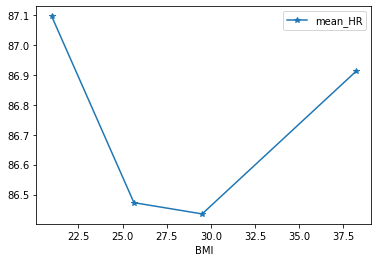

In [50]:
ht_wt_notna_hadmid_age_50_lab_chart_df[['BMI','mean_HR']].groupby(pd.cut(ht_wt_notna_hadmid_age_50_lab_chart_df['BMI'], [ht_wt_notna_hadmid_age_50_lab_chart_df['BMI'].min(),ht_wt_notna_hadmid_age_50_lab_chart_df['BMI'].describe()['25%'], ht_wt_notna_hadmid_age_50_lab_chart_df['BMI'].describe()['50%'],ht_wt_notna_hadmid_age_50_lab_chart_df['BMI'].describe()['75%'],ht_wt_notna_hadmid_age_50_lab_chart_df['BMI'].max()])).mean().plot(marker='*',x='BMI',y='mean_HR')

In [51]:
ht_wt_notna_hadmid_age_50_expired_lab_chart_df=ht_wt_notna_hadmid_age_50_expired_df.merge(labevents_chartevents_selectlist_mean_expiry_age_diagnosis_df[['HADM_ID','Alkaline Phosphatase','Anion Gap','Lactate','mean_HR']])
ht_wt_notna_hadmid_age_50_expired_lab_chart_df.shape

(1860, 16)

In [52]:
ht_wt_notna_hadmid_age_50_expired_lab_chart_df.head()

,HADM_ID,ICUSTAY_ID,weight_first,weight_min,weight_max,height_first,height_min,height_max,BMI,EXPIRE_FLAG,age in years,DIAGNOSIS,Alkaline Phosphatase,Anion Gap,Lactate,mean_HR
0,194340,217232,69.0,69.0,72.4,157.48,157.48,157.48,27.822636,1,76,HEART FAILURE,68.333333,15.931034,3.140000,100.596774
1,138376,256064,77.0,76.0,77.0,172.72,172.72,172.72,25.811038,1,75,PNEUMONIA;CHRONIC OBST PULM DISEASE,85.125000,14.447368,1.297143,77.504249
2,123860,213646,80.4,80.4,80.4,172.72,172.72,172.72,26.950746,1,55,HEPATIC ENCEPHALOPATHY,151.333333,12.733333,1.250000,68.075000
3,164735,284015,83.0,83.0,83.0,177.80,177.80,177.80,26.255155,1,56,GASTROINTESTINAL BLEED;HYPOTENSION,181.666667,16.250000,2.380000,76.017241
4,191151,227008,67.0,63.7,67.0,162.56,162.56,162.56,25.354055,1,57,? PNA INFILTRATE,125.583333,13.018868,1.400000,100.288889


In [53]:
ht_wt_notna_hadmid_age_50_expired_lab_chart_df[['BMI','age in years','Alkaline Phosphatase','Anion Gap','Lactate','mean_HR']].corr()

,BMI,age in years,Alkaline Phosphatase,Anion Gap,Lactate,mean_HR
BMI,1.000000,-0.146937,-0.018473,0.053866,0.019570,-0.023907
age in years,-0.146937,1.000000,-0.066847,-0.010778,-0.052636,-0.128362
Alkaline Phosphatase,-0.018473,-0.066847,1.000000,0.119092,0.078319,0.106845
Anion Gap,0.053866,-0.010778,0.119092,1.000000,0.573346,0.059747
Lactate,0.019570,-0.052636,0.078319,0.573346,1.000000,0.139150
mean_HR,-0.023907,-0.128362,0.106845,0.059747,0.139150,1.000000


In [54]:
ht_wt_notna_hadmid_age_50_expired_lab_chart_df.sort_values(by='BMI',ascending=False).head(20)

,HADM_ID,ICUSTAY_ID,weight_first,weight_min,weight_max,height_first,height_min,height_max,BMI,EXPIRE_FLAG,age in years,DIAGNOSIS,Alkaline Phosphatase,Anion Gap,Lactate,mean_HR
1056,170308,217144,202.0,178.0,202.0,167.64,167.64,167.64,71.878013,1,55,SCROTAL CELLULITIS,103.000000,11.466667,1.000000,95.809302
1360,157798,249436,177.7,177.7,177.7,162.56,162.56,162.56,67.245008,1,62,SEPSIS,152.200000,8.700000,1.000000,96.311688
1106,195487,214313,202.0,202.0,202.0,182.88,182.88,182.88,60.397497,1,57,ALTERED MENTAL STATUS,101.000000,12.714286,1.328571,91.675481
619,196151,256853,177.2,177.2,184.8,172.72,172.72,172.72,59.398908,1,69,CORONARY ARTERY DISEASE,109.200000,11.285714,2.257143,81.409091
618,199740,262164,177.3,175.4,189.3,175.26,175.26,175.26,57.722233,1,69,ISCHEMIA;HYPOTENSION,84.800000,12.131579,3.700000,80.320076
1684,106899,278456,155.6,155.6,155.6,165.10,165.10,165.10,57.084138,1,79,DEHYDRATION,139.000000,17.583333,3.733333,101.941558
372,181862,278889,177.3,177.3,182.7,177.80,177.80,177.80,56.084806,1,53,CONGESTIVE HEART FAILURE,202.200000,11.556818,1.080000,83.686491
821,176565,208338,138.0,104.6,138.0,157.48,157.48,157.48,55.645273,1,60,HYPOTENSION,69.200000,11.357143,1.700000,85.270833
1493,115151,286307,196.0,192.6,198.3,187.96,187.96,187.96,55.478562,1,53,BRAIN MASS,82.000000,11.266667,1.950000,71.156522
953,113307,246244,175.1,139.4,178.3,177.80,177.80,177.80,55.388886,1,61,CONGESTIVE HEART FAILURE,207.571429,18.795918,4.169565,84.375691


In [55]:
ht_wt_notna_hadmid_age_50_expired_lab_chart_df.sort_values(by='BMI',ascending=False).tail(20)

,HADM_ID,ICUSTAY_ID,weight_first,weight_min,weight_max,height_first,height_min,height_max,BMI,EXPIRE_FLAG,age in years,DIAGNOSIS,Alkaline Phosphatase,Anion Gap,Lactate,mean_HR
444,176325,240458,53.8,53.8,53.8,182.88,182.88,182.88,16.086066,1,59,HYPOXIA,223.787879,10.666667,2.250000,104.777778
862,119137,255590,47.4,47.4,47.4,172.72,172.72,172.72,15.888873,1,56,ACUTE LYMPHOBLASTIC LEUKEMIA,478.348837,9.645833,1.666667,94.898026
1251,181458,211596,49.9,49.9,49.9,177.80,177.80,177.80,15.784725,1,76,ST-SEGMENT ELEVATION MYOCARDIAL INFARCTION\CATH,68.333333,10.310345,1.400000,94.939216
89,180836,243173,49.5,49.5,49.5,177.80,177.80,177.80,15.658195,1,67,ASTHMA;COPD EXACERBATION,56.500000,11.444444,1.125000,83.284091
1205,130450,296053,53.6,53.6,53.6,185.42,185.42,185.42,15.590198,1,65,PNEUMONIA,164.500000,10.384615,1.133333,95.664000
1337,193923,278240,36.1,36.1,36.1,152.40,152.40,152.40,15.543087,1,76,ASTHMA/COPD FLARE,94.222222,7.176471,1.246154,89.734584
1194,142643,234427,37.0,37.0,37.0,154.94,154.94,154.94,15.412554,1,67,PNEUMONIA,90.333333,13.058824,2.309091,111.000000
360,112147,268747,44.5,44.5,44.5,170.18,170.18,170.18,15.365368,1,65,PNEUMONIA,143.000000,12.230769,1.400000,84.000000
564,127775,251849,51.3,50.6,55.3,182.88,182.88,182.88,15.338572,1,55,FEMUR FRACTURE,47.000000,8.736842,0.733333,74.107417
1207,158815,290586,40.0,40.0,58.1,162.56,162.56,162.56,15.136749,1,76,TRAUMA,92.500000,12.192308,1.630000,78.810651


In [90]:
ht_wt_notna_hadmid_age_50_expired_lab_chart_df[ht_wt_notna_hadmid_age_50_expired_lab_chart_df['DIAGNOSIS']=='CONGESTIVE HEART FAILURE']['BMI'].mean()

30.398248593678307

In [83]:
# ht_wt_notna_hadmid_age_50_expired_lab_chart_df[ht_wt_notna_hadmid_age_50_expired_lab_chart_df['DIAGNOSIS']=='CONGESTIVE HEART FAILURE']['age in years'].mean()

In [92]:
ht_wt_notna_hadmid_age_50_expired_lab_chart_df[ht_wt_notna_hadmid_age_50_expired_lab_chart_df['DIAGNOSIS']=='CONGESTIVE HEART FAILURE'][['BMI','age in years']].corr()

,BMI,age in years
BMI,1.00000,-0.59778
age in years,-0.59778,1.00000


In [64]:
# ht_wt_notna_hadmid_age_50_expired_lab_chart_df[ht_wt_notna_hadmid_age_50_expired_lab_chart_df['DIAGNOSIS']=='CONGESTIVE HEART FAILURE']['mean_HR'].mean()

In [96]:
ht_wt_notna_hadmid_age_50_expired_lab_chart_df[ht_wt_notna_hadmid_age_50_expired_lab_chart_df['DIAGNOSIS']!='CONGESTIVE HEART FAILURE']['BMI'].mean()

27.785117316198637

In [74]:
ht_wt_notna_hadmid_age_50_lab_chart_df.head(2)

,HADM_ID,ICUSTAY_ID,weight_first,weight_min,weight_max,height_first,height_min,height_max,BMI,EXPIRE_FLAG,age in years,DIAGNOSIS,Alkaline Phosphatase,Anion Gap,Lactate,mean_HR
0,194340,217232,69.0,69.0,72.4,157.48,157.48,157.48,27.822636,1,76,HEART FAILURE,68.333333,15.931034,3.140000,100.596774
1,138376,256064,77.0,76.0,77.0,172.72,172.72,172.72,25.811038,1,75,PNEUMONIA;CHRONIC OBST PULM DISEASE,85.125000,14.447368,1.297143,77.504249


In [81]:
ht_wt_notna_hadmid_age_50_lab_chart_bmi_30_df=ht_wt_notna_hadmid_age_50_lab_chart_df[ht_wt_notna_hadmid_age_50_lab_chart_df['BMI']>=30]
ht_wt_notna_hadmid_age_50_lab_chart_bmi_30_df.shape

(1389, 16)

<AxesSubplot:xlabel='age in years'>

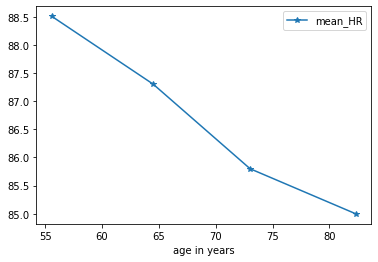

In [75]:
ht_wt_notna_hadmid_age_50_lab_chart_df[['age in years','mean_HR']].groupby(pd.cut(ht_wt_notna_hadmid_age_50_lab_chart_df['age in years'], [ht_wt_notna_hadmid_age_50_lab_chart_df['age in years'].min(),ht_wt_notna_hadmid_age_50_lab_chart_df['age in years'].describe()['25%'], ht_wt_notna_hadmid_age_50_lab_chart_df['age in years'].describe()['50%'],ht_wt_notna_hadmid_age_50_lab_chart_df['age in years'].describe()['75%'],ht_wt_notna_hadmid_age_50_lab_chart_df['age in years'].max()])).mean().plot(marker='*',x='age in years',y='mean_HR')

<AxesSubplot:xlabel='age in years'>

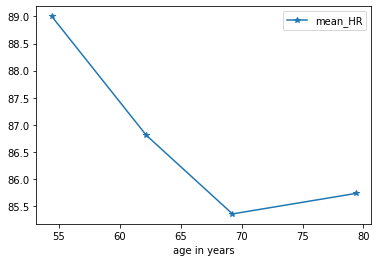

In [82]:
ht_wt_notna_hadmid_age_50_lab_chart_bmi_30_df[['age in years','mean_HR']].groupby(pd.cut(ht_wt_notna_hadmid_age_50_lab_chart_bmi_30_df['age in years'], [ht_wt_notna_hadmid_age_50_lab_chart_bmi_30_df['age in years'].min(),ht_wt_notna_hadmid_age_50_lab_chart_bmi_30_df['age in years'].describe()['25%'], ht_wt_notna_hadmid_age_50_lab_chart_bmi_30_df['age in years'].describe()['50%'],ht_wt_notna_hadmid_age_50_lab_chart_bmi_30_df['age in years'].describe()['75%'],ht_wt_notna_hadmid_age_50_lab_chart_bmi_30_df['age in years'].max()])).mean().plot(marker='*',x='age in years',y='mean_HR')